<a href="https://colab.research.google.com/github/maxfraid/compmathsystem/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%964_%D0%91%D0%B8%D0%B1%D0%BB%D0%B8%D0%BE%D1%82%D0%B5%D0%BA%D0%B0_SciPy_%D0%A7%D0%B0%D1%81%D1%82%D1%8C_%E2%84%961_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Блок №1. Базовый уровень**

### **1. Константы**

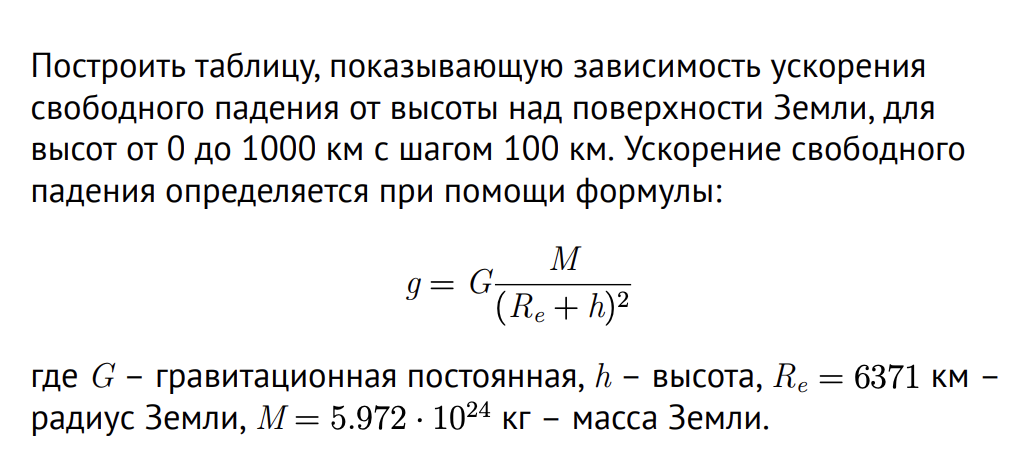

In [ ]:
import numpy as np
from scipy.constants import  G

def calculate_g(h: float) -> float:
    M = 5.972 * 10 ** 24
    Re = 6371

    return (G * M / (Re + h) ** 2) * 10 ** -6

h_data = np.linspace(0, 1000, 11)
g_data = calculate_g(h_data)

print("\tВысота (км)\tУскорение свободного падения (м/c^2)")
for i in range(len(g_data)):
    print(f"{i}\t\t{h_data[i]:.0f}\t\t{g_data[i]:.6f}")

	Высота (км)	Ускорение свободного падения (м/c^2)
0		0		9.819973
1		100		9.518811
2		200		9.231294
3		300		8.956610
4		400		8.694005
5		500		8.442783
6		600		8.202294
7		700		7.971937
8		800		7.751149
9		900		7.539408
10		1000		7.336226


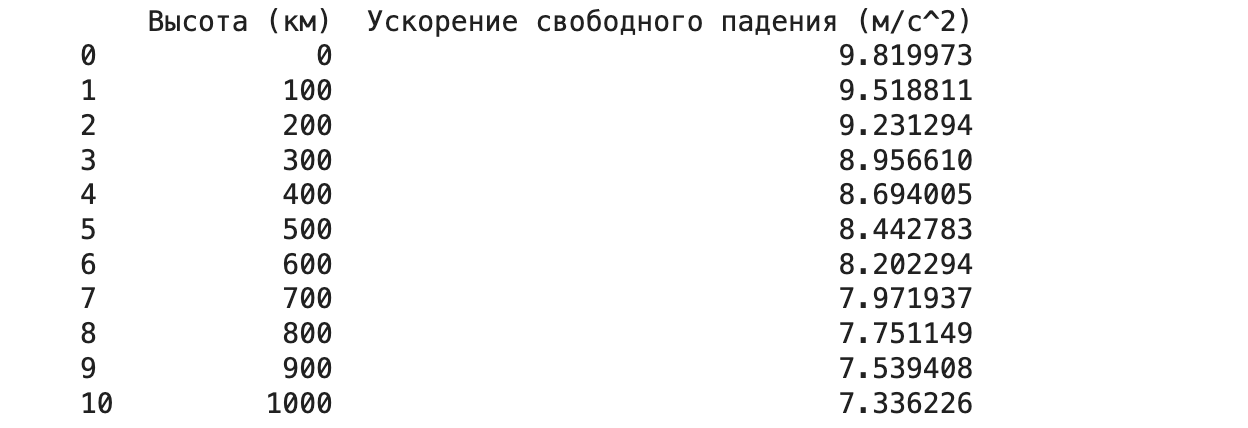

### **2. Линейная алгебра**

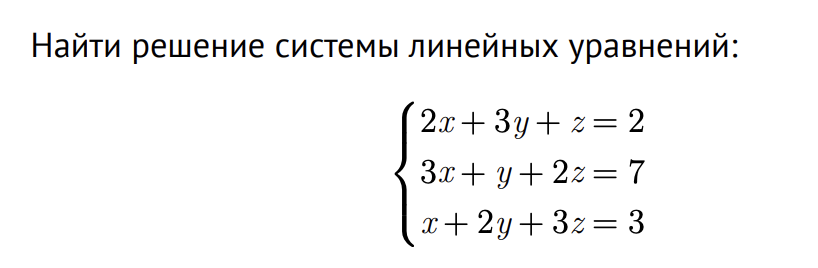

In [ ]:
import numpy as np
from scipy.linalg import solve

coefficient_matrix = ([[2, 3, 1],
                       [3, 1, 2],
                       [1, 2, 3]])

right_part_matrix = ([2, 7, 3])

roots = solve(coefficient_matrix, right_part_matrix)

print(f"""Решение системы линейных уравнений:

x = {roots[0]}
y = {roots[1]}
z = {roots[2]}
""")

Решение системы линейных уравнений:

x = 2.0
y = -0.9999999999999998
z = 1.0



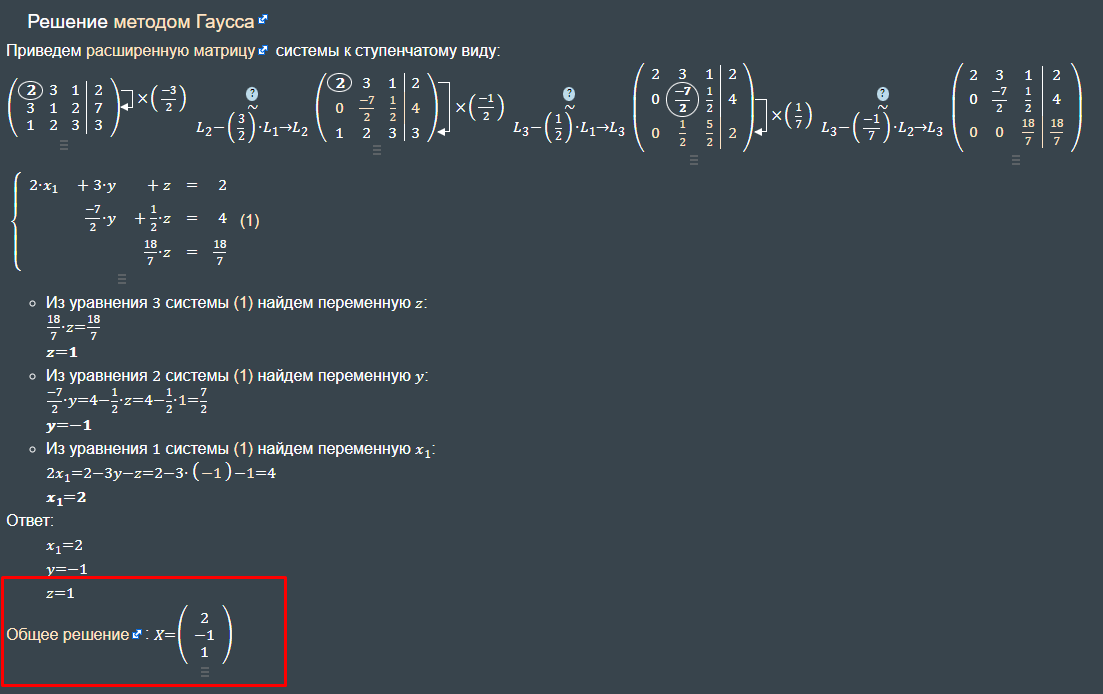

### **3. Интегрирование**

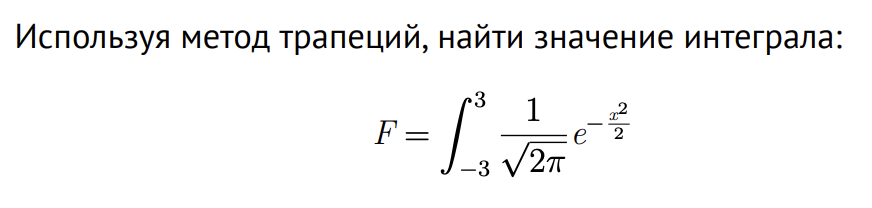

In [ ]:
import numpy as np
from scipy.constants import pi
from scipy.integrate import trapz

def f(x):
    return 1 / np.sqrt(2 * pi) * np.exp(-x**2 / 2)

a = -3
b = 3

x_values = np.linspace(a, b, 1000)
y_values = f(x_values)

integral_value = trapz(y_values, x_values)

print(f"Значение интеграла: {integral_value:.6f}")

Значение интеграла: 0.997300


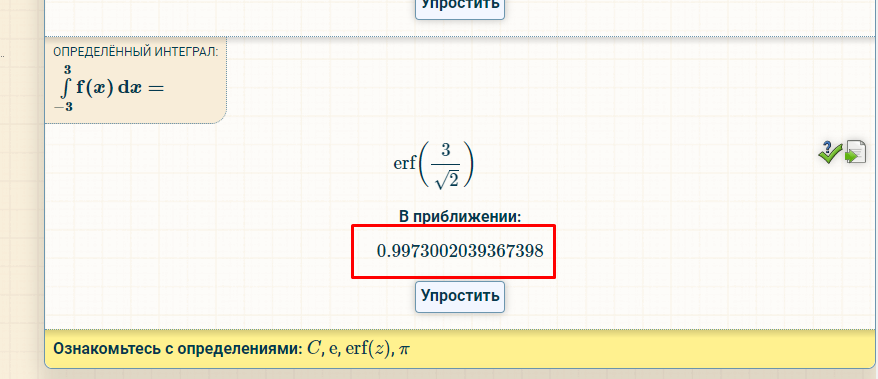

### **4. Методы оптимизации. Поиск корней уравнения**

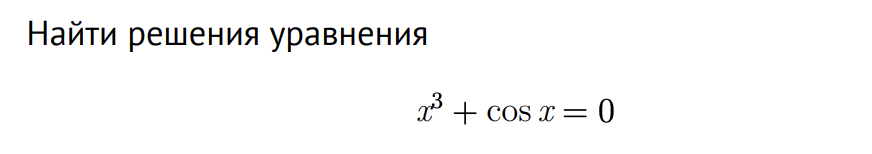

**Сделайте это разными способами, постройте график функции**

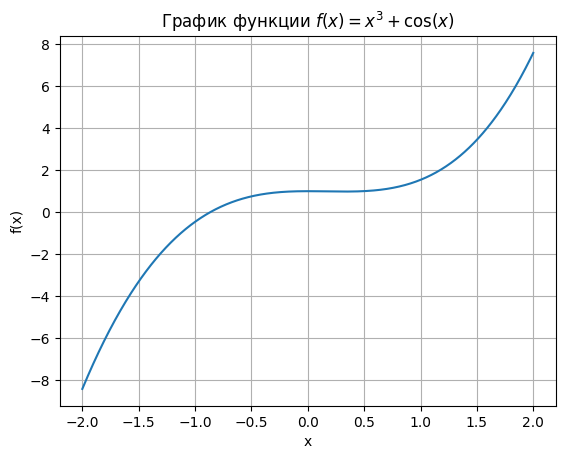

Корень уравнения: [-0.86547403]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

x_vals = np.linspace(-2, 2, 1000)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("График функции $f(x) = x^3 + \cos(x)$")
plt.grid(True)

plt.show()

def f(x):
    return x**3 + np.cos(x)

roots = fsolve(f, -1)
print(f"Корень уравнения: {roots}")

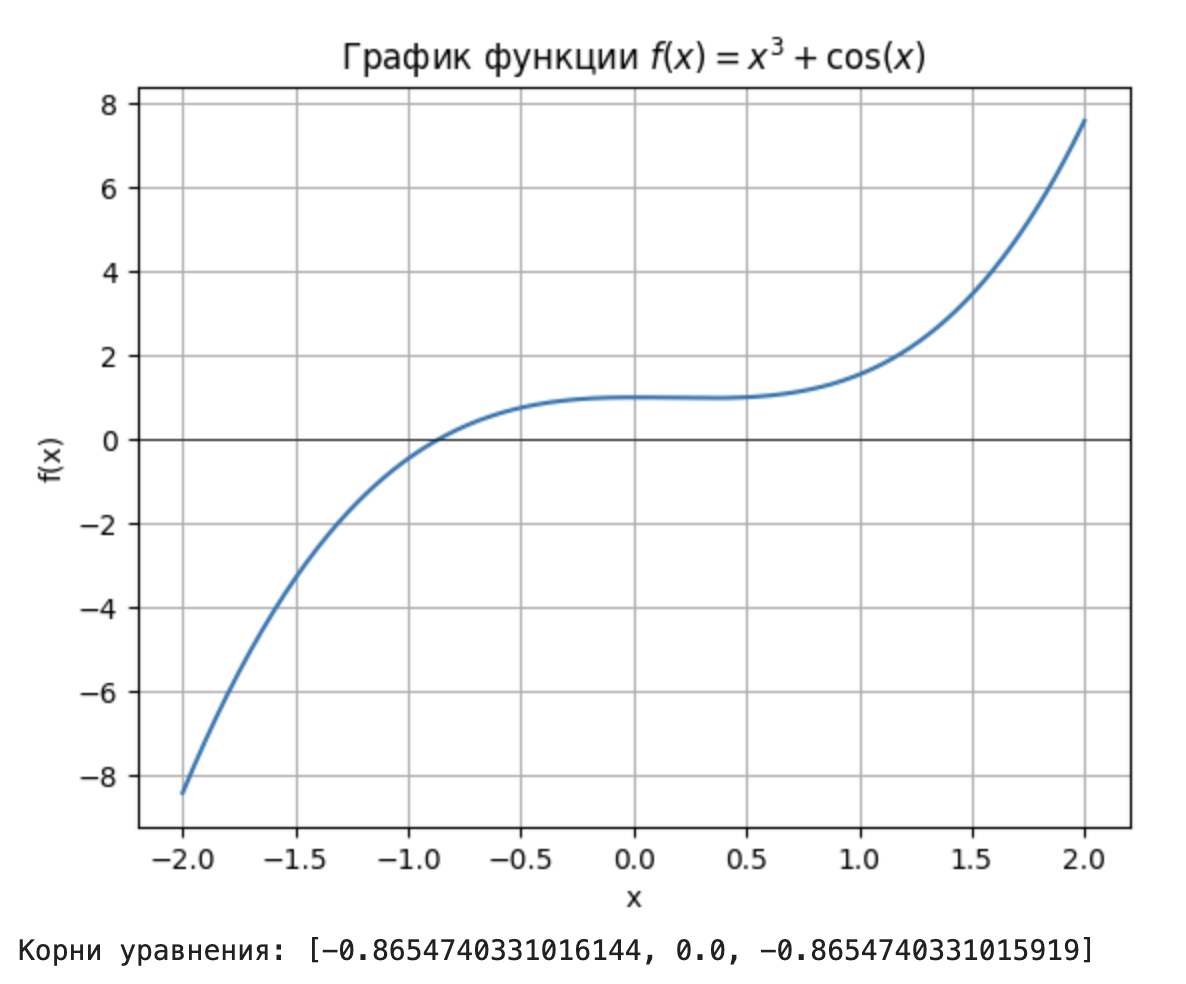

In [ ]:
def bisection(f, a, b, tol = 10 ** -6) -> float:
    if np.sign(f(a)) == np.sign(f(b)):
        raise ValueError("Значения функции на концах интервала должны иметь разные знаки")

    while (b - a) / 2 > tol:
        c = (a + b) / 2
        if f(c) == 0:
            return c
        elif np.sign(f(c)) == np.sign(f(a)):
            a = c
        else:
            b = c
    return (a + b) / 2

root = bisection(f, -2, 2)
print(f"Корень уравнения: {root}")

Корень уравнения: -0.865473747253418


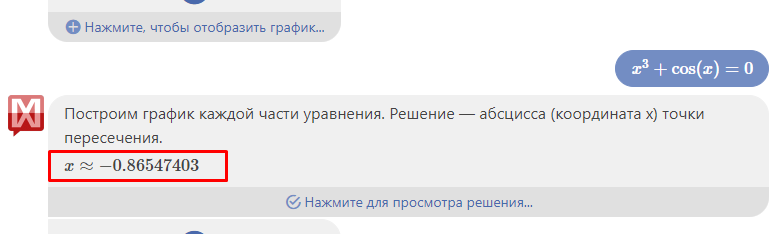

### **5. Методы оптимизации. Поиск минимума**

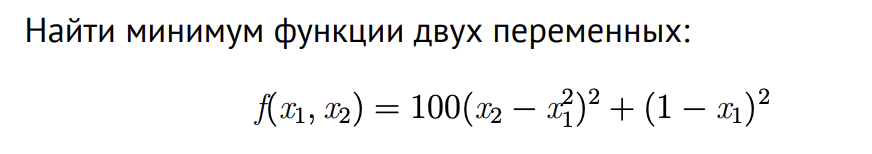

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def f(x) -> float:
    x1, x2 = x
    return 100 * (x2 - x1**2)**2 + (1 - x1)**2

initial_guess = [0, 0]

result = minimize(f, initial_guess, method='BFGS')

print("Минимум функции f(x1, x2):", result.fun)
print("Значения x1 и x2 при минимуме:", result.x)

Минимум функции f(x1, x2): 2.8439915001532524e-11
Значения x1 и x2 при минимуме: [0.99999467 0.99998932]


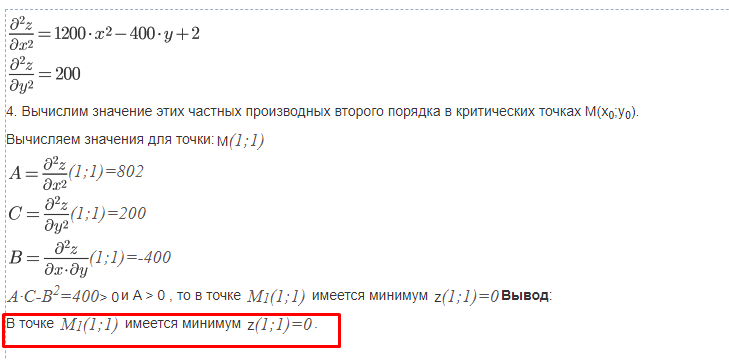

## **Блок №2. Повышенный уровень**

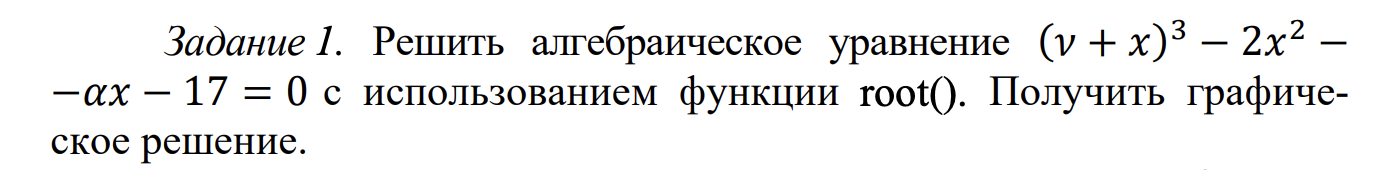

Корень функции: 3.892618270436398


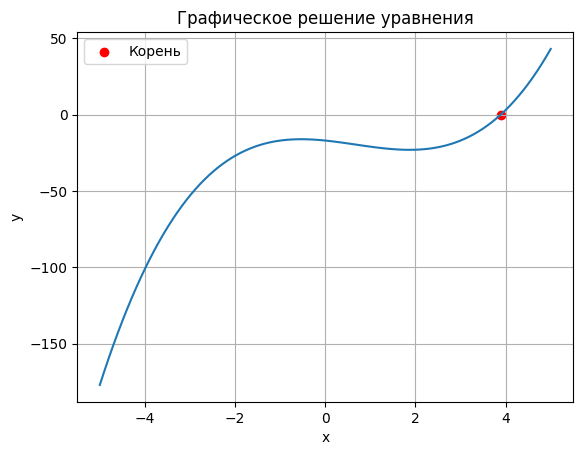

In [ ]:
import numpy as np
from scipy.optimize import root
import matplotlib.pyplot as plt

def f(x, v = 0, alpha=3):
    return (v + x)**3 - 2 * x**2 - alpha * x - 17

x0 = 4

result = root(f, x0)

print("Корень функции:", result.x[0])

x = np.linspace(-5, 5, 100)
y = f(x)

plt.plot(x, y)
plt.scatter(result.x, f(result.x), color='red', label='Корень')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Графическое решение уравнения')
plt.grid(True)

plt.show()

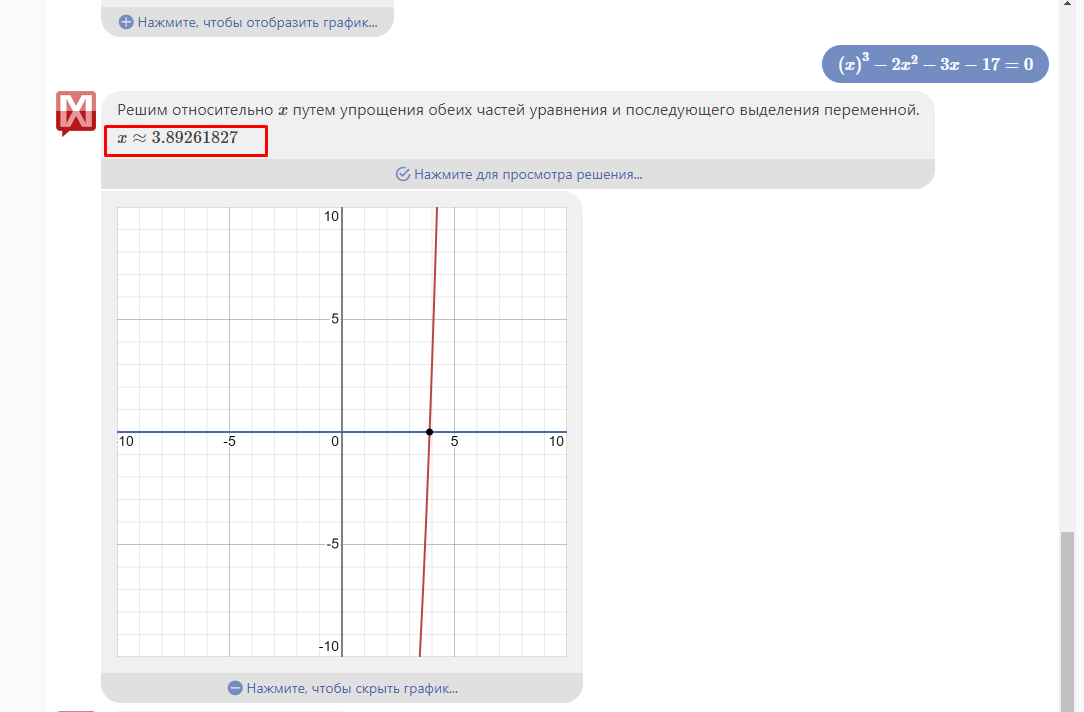

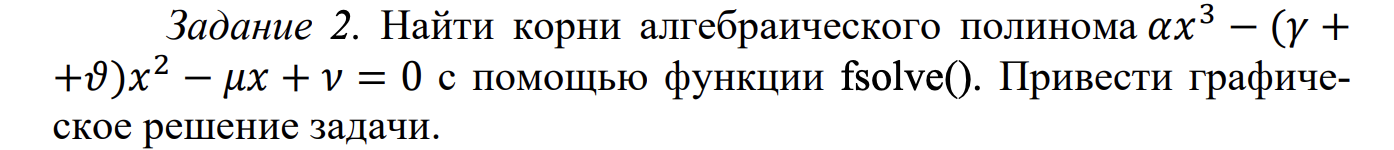

Корни полинома: [-0.79128785  0.          3.79128785]


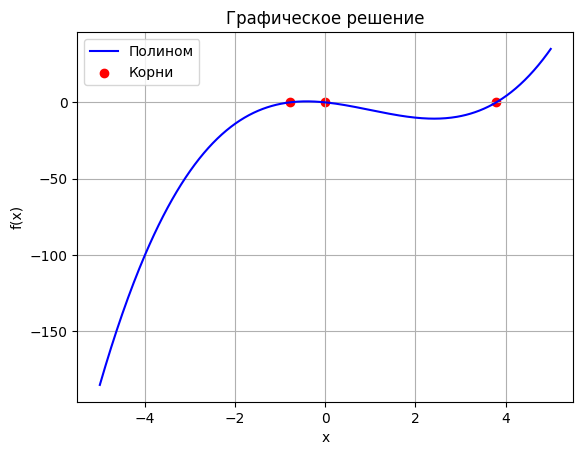

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def polynomial_eq(x, alpha = 1, gamma = 1, eps = 2, mu = 3, nu = 0):
    return alpha * x**3 - (gamma + eps) * x**2 - mu * x + nu

initial_guess = [-2, 0, 5]

roots = fsolve(polynomial_eq, initial_guess)
print("Корни полинома:", roots)

x_vals = np.linspace(-5, 5, 400)
y_vals = polynomial_eq(x_vals)

plt.plot(x_vals, y_vals, color="b", label="Полином")

plt.scatter(roots, np.zeros_like(roots), color='red', label="Корни")

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Графическое решение")
plt.legend()
plt.grid(True)
plt.show()

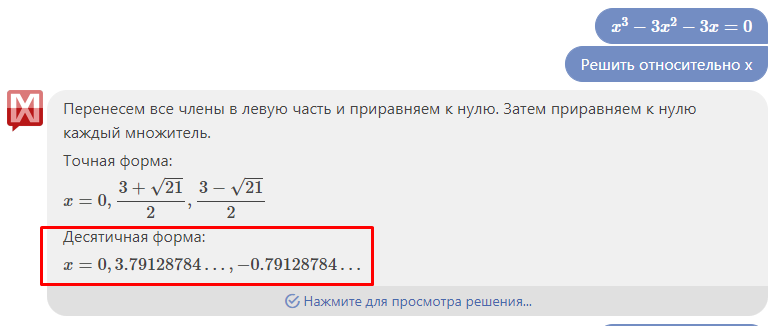

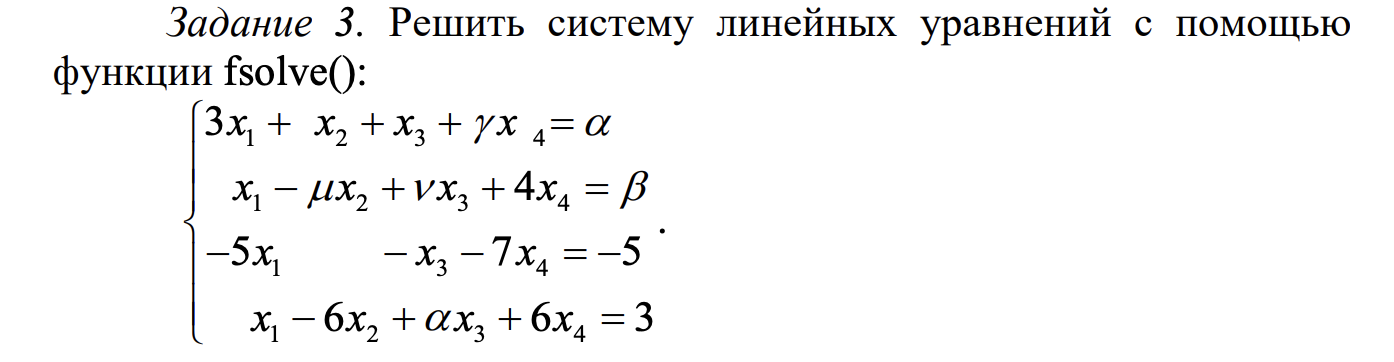

In [ ]:
from scipy.optimize import fsolve

def equations(x, alpha = 3, beta = 0, gamma = 0, nu = 1, mu = 4):
    x1, x2, x3, x4 = x
    eq1 = 3*x1 + x2 + x3 + gamma*x4 - alpha
    eq2 = x1 - mu*x2 + nu*x3 + 4*x4 - beta
    eq3 = -5*x1 - x3 - 7*x4 + 5
    eq4 = x1 - 6*x2 + alpha*x3 + 6*x4 - 3
    return [eq1, eq2, eq3, eq4]

initial_guess = [1, 1, 1, 1]

roots = fsolve(equations, initial_guess)
print("Корни системы уравнений:")
print()
print("x1 =", roots[0])
print("x2 =", roots[1])
print("x3 =", roots[2])
print("x4 =", roots[3])

Корни системы уравнений:

x1 = 0.024590163934426364
x2 = 0.9180327868852458
x3 = 2.0081967213114753
x4 = 0.4098360655737705


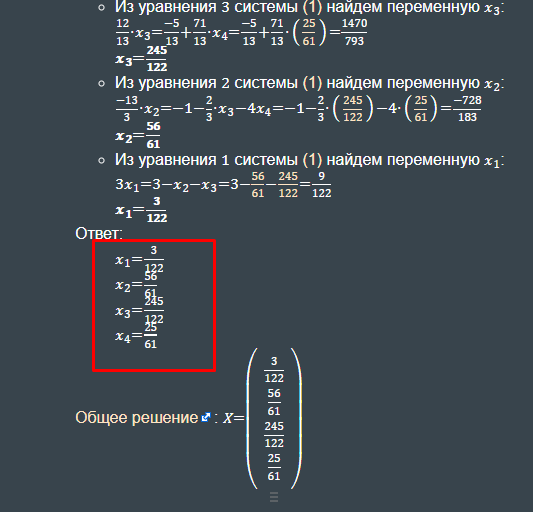
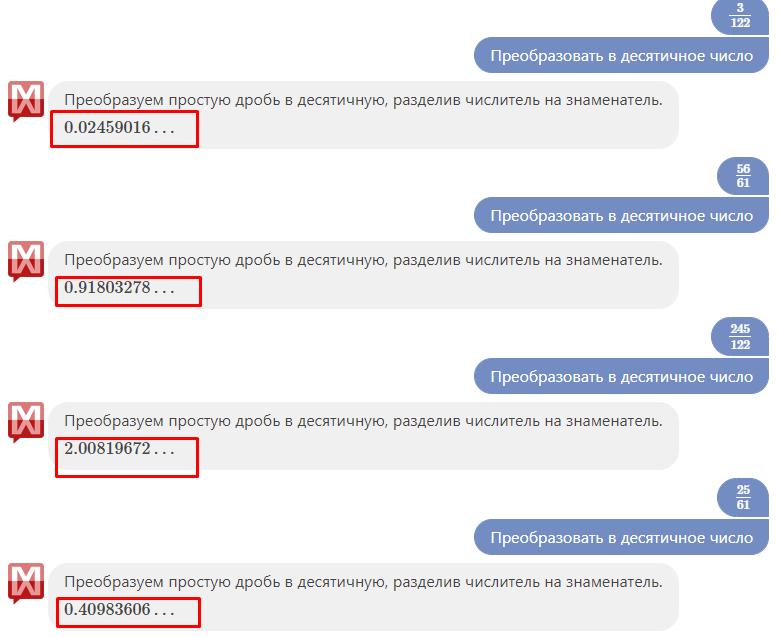

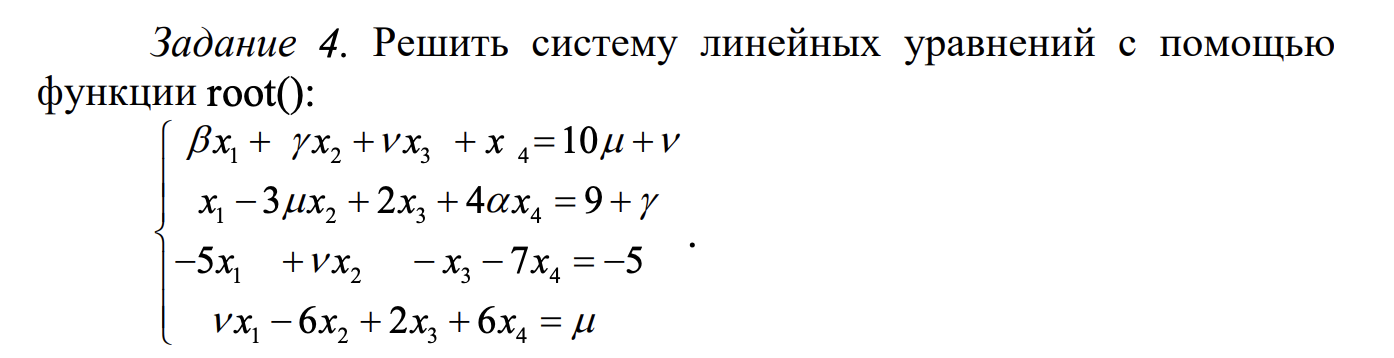

In [ ]:
from scipy.optimize import root

def solving(x, alpha = 1, beta = 3, gamma = 2, nu = 1, mu = 0) -> float:
    x1, x2, x3, x4 = x
    eq1 = beta*x1 + gamma*x2 + nu*x3 + x4 - 10*mu - nu
    eq2 = x1 - 3*mu*x2 + 2*x3 + 4*alpha*x4 - 9 - gamma
    eq3 = -5*x1 + nu*x2 -x3 - 7*x4 + 5
    eq4 = nu*x1 - 6*x2 + 2*x3 + 6*x4 - mu
    return [eq1, eq2, eq3, eq4]

initial_guess = [0, 0, 0, 0]

result = root(solving, initial_guess)
roots = result.x

print("Корни системы уравнений:")
print()
print("x1 =", roots[0])
print("x2 =", roots[1])
print("x3 =", roots[2])
print("x4 =", roots[3])

Корни системы уравнений:

x1 = -2.8607594936708862
x2 = 2.8481012658227853
x3 = 0.8417721518987327
x4 = 3.044303797468355


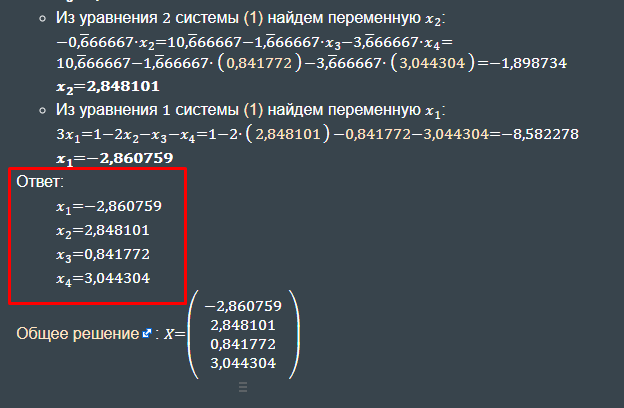

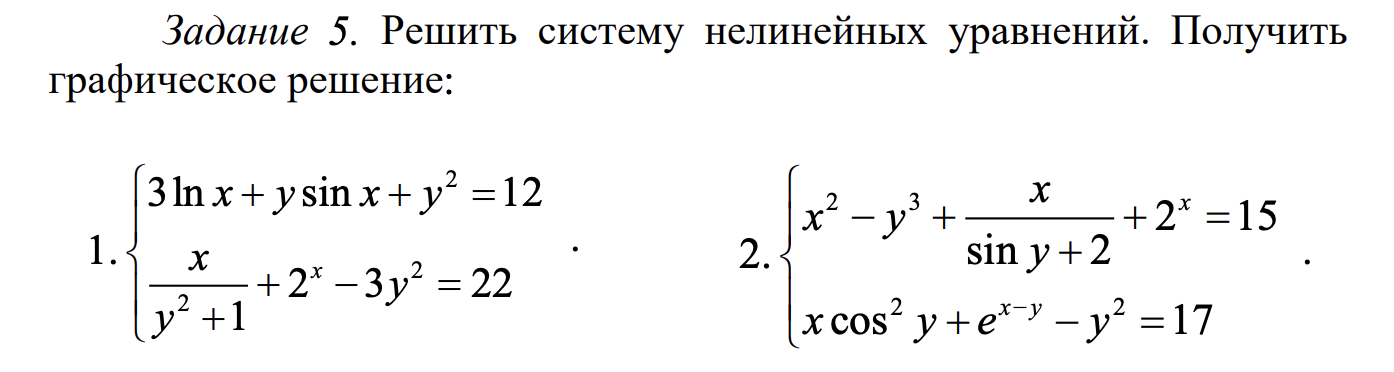

Корни первой системы уравнений: [5.5767428  2.96076171]
Корни второй системы уравнений: [ 0.79761132 -2.28852616]


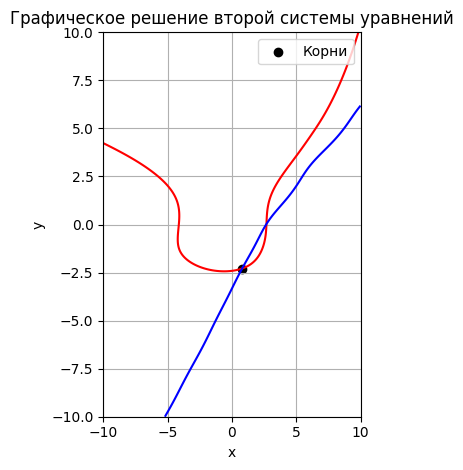

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# 3ln(x)+y*sin(x)+y^2=12
# x/(y^2+1)+2^x-3y^2=22
def first_sys(vars) -> float:
    x, y = vars
    eq1 = 3*np.log(x) + y*np.sin(x) + y**2 - 12
    eq2 = x / (y**2 + 1) + 2**x - 3*y**2 - 22
    return [eq1, eq2]

# x^2-y^3+x/(sin(y)+2)+2^x=15
# x*cos(y)^2+e^(x-y)-y^2=17
def second_sys(vars) -> float:
    x, y = vars
    eq1 = x**2 - y**3 + x / (np.sin(y) + 2) + 2**x - 15
    eq2 = x*np.cos(y)**2 + np.exp(x-y) - y**2 - 17
    return [eq1, eq2]

initial_guess_first_sys = [3, 1]
initial_guess_second_sys = [2, 3]

first_result = fsolve(first_sys, initial_guess_first_sys)
second_result = fsolve(second_sys, initial_guess_second_sys)

print("Корни первой системы уравнений:", first_result)
print("Корни второй системы уравнений:", second_result)

x_vals = np.linspace(-10, 10, 1000)
y_vals = np.linspace(-10, 10, 1000)

X, Y = np.meshgrid(x_vals, y_vals)

Z1 = X**2 - Y**3 + X / (np.sin(Y) + 2) + 2**X - 15
Z2 = X*np.cos(Y)**2 + np.exp(X-Y) - Y**2 - 17

plt.subplot(1, 2, 2)
plt.contour(X, Y, Z1, levels=[0], colors='r')
plt.contour(X, Y, Z2, levels=[0], colors='b')
plt.scatter(second_result[0], second_result[1], color='black', label='Корни')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Графическое решение второй системы уравнений')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

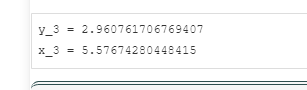

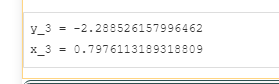

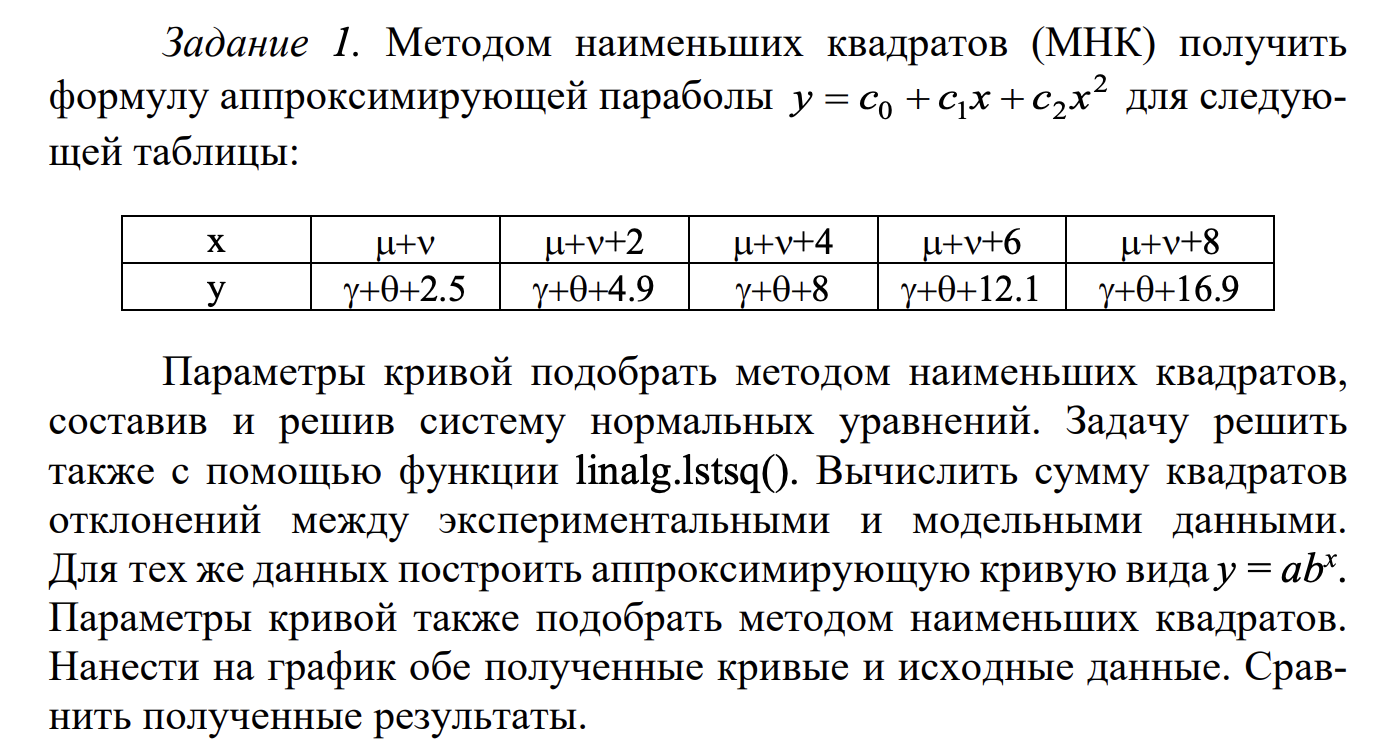

**Ход работы:**

1. **Определение переменных**: Определяем переменные $ \mu $, $ \nu $, и $ \gamma $, которые будут использоваться в наших уравнениях.

3. **Создание массивов данных**: Создаем два массива: `x_values` и `y_values`. `x_values` содержит значения $ x $, которые мы получаем, добавляя к $ \mu + \nu $ числа от 0 до 8 с шагом 2. `y_values` содержит соответствующие значения $ y $, которые мы также вычисляем, используя заданные значения $ \gamma $ и добавляя к нему разные числа.

4. **Подготовка матрицы коэффициентов**: Создаем матрицу `A`, которая будет использоваться для нахождения коэффициентов нашей параболы. Каждая строка матрицы `A` представляет собой значения $ 1 $, $ x $, и $ x^2 $ для каждого значения из `x_values`.

5. **Решение методом наименьших квадратов**: Функция `lstsq` принимает нашу матрицу `A` и массив `y_values`, и находит коэффициенты $ c_0 $, $ c_1 $, и $ c_2 $, которые минимизируют разницу между фактическими значениями $ y $ и значениями, предсказанными нашей параболой.

6. **Вывод результатов**: В конце мы выводим найденные коэффициенты и сумму квадратов отклонений, которая показывает, насколько хорошо наша парабола соответствует данным.

Коэффициенты параболы (c0, c1, c2): [ 3.36571429 -0.68571429  0.10357143]
Сумма квадратов отклонений (SSE): 0.005142857142857243


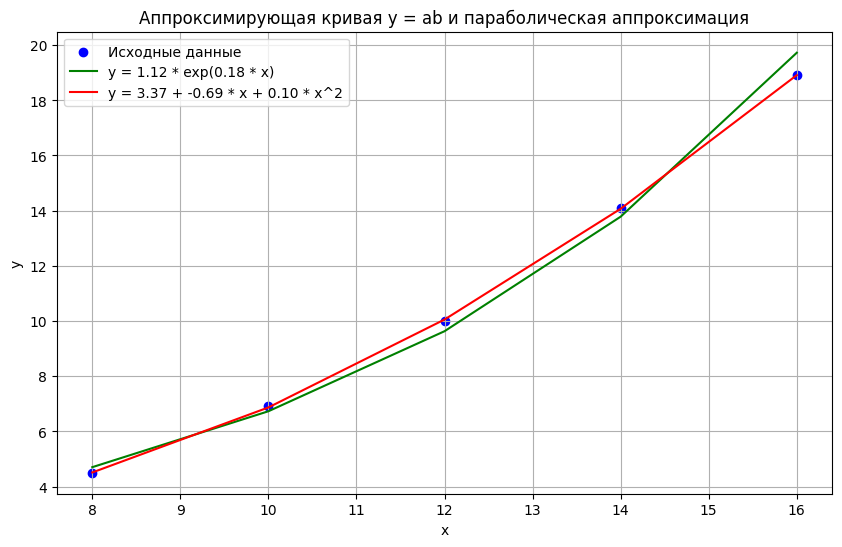

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

mu = 3
nu = 5
gamma = 2

x_values = np.linspace(0, 8, 5) + nu + mu
y_values = np.array([2.5, 4.9, 8, 12.1, 16.9]) + gamma

A = np.vstack([np.ones(len(x_values)), x_values, x_values**2]).T
coefficients = np.linalg.lstsq(A, y_values, rcond=None)[0]

predicted_y_values = np.dot(A, coefficients)
SSE = np.sum((predicted_y_values - y_values)**2)

print("Коэффициенты параболы (c0, c1, c2):", coefficients)
print("Сумма квадратов отклонений (SSE):", SSE)

log_y_values = np.log(y_values)
A_ab = np.vstack([np.ones(len(x_values)), x_values]).T
a, b = np.linalg.lstsq(A_ab, log_y_values, rcond=None)[0]
predicted_y_values_ab = np.exp(a + b * x_values)

plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, label='Исходные данные', color='blue')
plt.plot(x_values, predicted_y_values_ab, label=f'y = {np.exp(a):.2f} * exp({b:.2f} * x)', color='green')
plt.plot(x_values, predicted_y_values, label=f'y = {coefficients[0]:.2f} + {coefficients[1]:.2f} * x + {coefficients[2]:.2f} * x^2', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Аппроксимирующая кривая у = ab и параболическая аппроксимация')
plt.legend()
plt.grid(True)

plt.show()


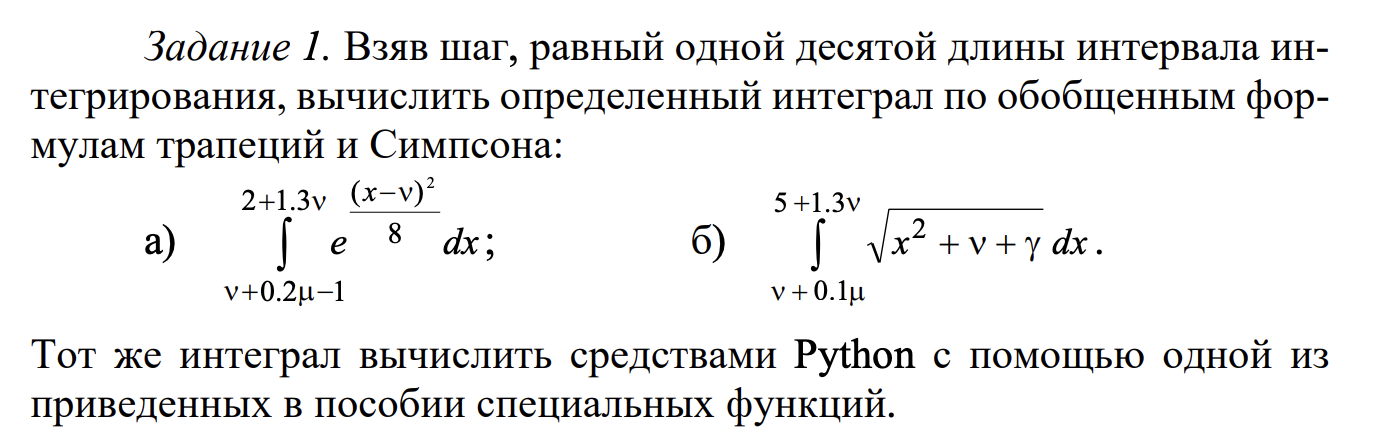

In [ ]:
import numpy as np
from scipy.integrate import quad

# e^((x-1)^2/8)
def f1(x, nu = 1, mu = 2):
    return np.exp(((x - nu) ** 2) / 8)

# sqrt(x^2+1+3)
def f2(x, nu = 1, mu = 2, gamma = 3):
    return np.sqrt(x ** 2 + nu + gamma)

def trapezoidal_rule(f, a, b, n=10):
    h = (b - a) / n
    result = 0.5 * (f(a) + f(b))
    for i in range(1, n):
        result += f(a + i * h)
    return result * h

def simpsons_rule(f, a, b, n=10):
    h = (b - a) / n
    result = f(a) + f(b)
    for i in range(1, n, 2):
        result += 4 * f(a + i * h)
    for i in range(2, n-1, 2):
        result += 2 * f(a + i * h)
    return result * h / 3

nu = 1
mu = 2
integral1, _ = quad(lambda x: f1(x), nu + 0.2*mu - 1, 2 + 1.3*nu)
integral2, _ = quad(lambda x: f2(x), nu + 0.1*mu, 5 + 1.3*nu)

print("Интеграл 1 (метод трапеций):", trapezoidal_rule(lambda x: f1(x), nu + 0.2*mu - 1, 2 + 1.3*nu))
print("Интеграл 1 (метод Симпсона):", simpsons_rule(lambda x: f1(x), nu + 0.2*mu - 1, 2 + 1.3*nu))
print("Интеграл 1 (quad):", integral1)
print()
print("Интеграл 2 (метод трапеций):", trapezoidal_rule(lambda x: f2(x), nu + 0.1*mu, 5 + 1.3*nu))
print("Интеграл 2 (метод Симпсона):", simpsons_rule(lambda x: f2(x), nu + 0.1*mu, 5 + 1.3*nu))
print("Интеграл 2 (quad):", integral2)


Интеграл 1 (метод трапеций): 3.543654132251456
Интеграл 1 (метод Симпсона): 3.5348121001953676
Интеграл 1 (quad): 3.534760904515929

Интеграл 2 (метод трапеций): 22.02309490900159
Интеграл 2 (метод Симпсона): 22.013685292358108
Интеграл 2 (quad): 22.01360680282975


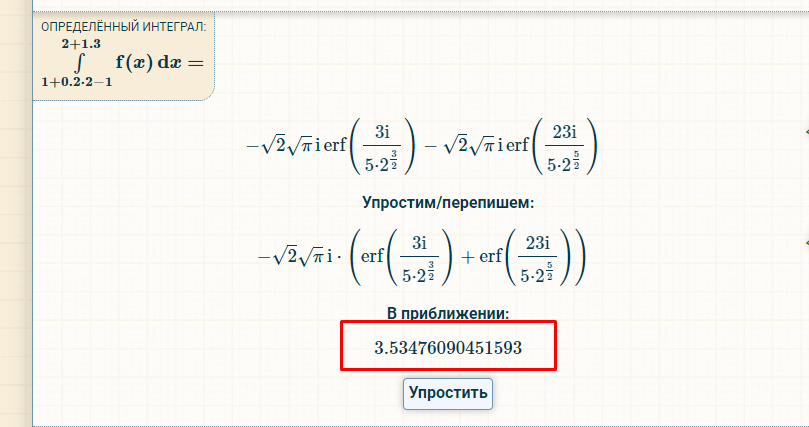
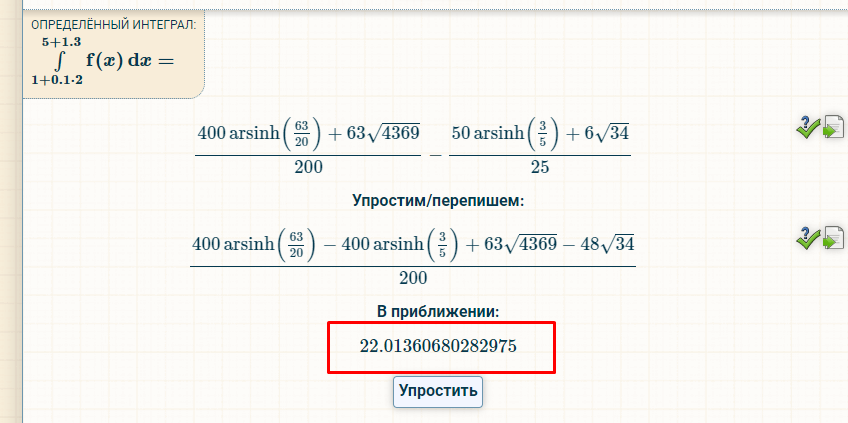

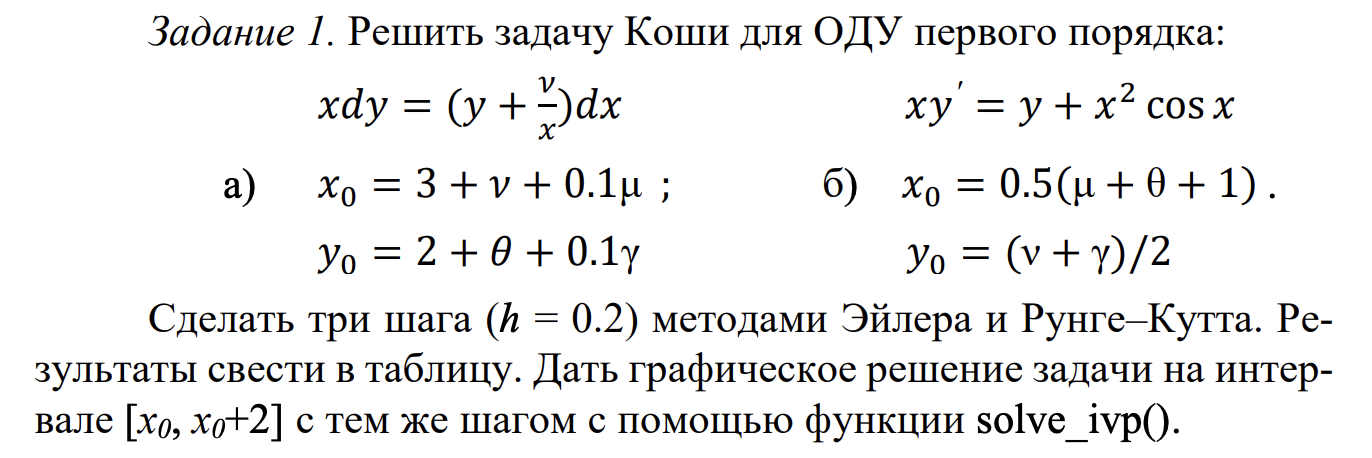

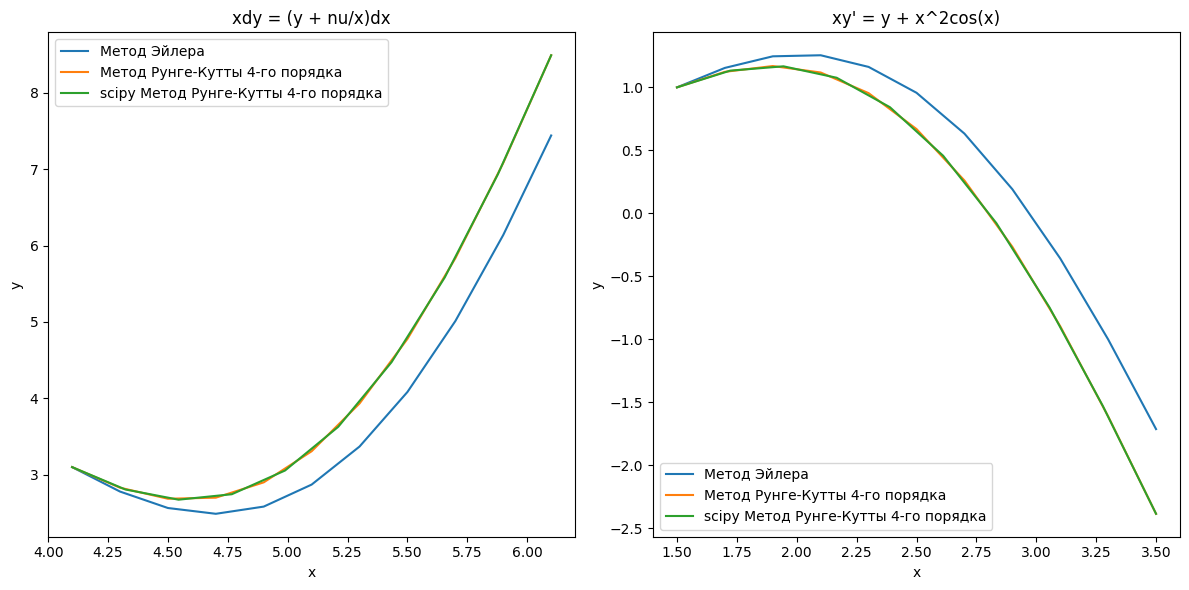

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def euler(f, x0, y0, h, n):
    y = [y0]
    for i in range(n):
        y.append(y[i] + h * f(x0 + i * h, y[i]))
    return y

def rk4(f, x0, y0, h, n):
    y = [y0]
    for i in range(n):
        k1 = h * f(x0 + i * h, y[i])
        k2 = h * f(x0 + i * h + h / 2, y[i] + k1 / 2)
        k3 = h * f(x0 + i * h + h / 2, y[i] + k2 / 2)
        k4 = h * f(x0 + i * h + h, y[i] + k3)
        y.append(y[i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6)
    return y

def func(x, y):
    return (y + np.cos(x) * x**2) / x

# Параметры для первого уравнения
nu = 1
mu = 2
theta = 1
y = 1
x0 = 3 + nu + 0.1 * mu
# 4.2, 6.2
y0 = 2 + theta + 0.1 * y

# Параметры для второго уравнения
x0_alt = 0.5 * (mu + theta + 1)
y0_alt = (nu + y) / 2

h = 0.2
n = 10

# Вычисление решений
y_euler = euler(func, x0, y0, h, n)
y_rk4 = rk4(func, x0, y0, h, n)
solution = solve_ivp(func, (x0, x0 + 2), y0=[y0], dense_output=True, t_eval=np.linspace(x0, x0 + 2, 10))

y_euler_alt = euler(func, x0_alt, y0_alt, h, n)
y_rk4_alt = rk4(func, x0_alt, y0_alt, h, n)
solution_alt = solve_ivp(func, (x0_alt, x0_alt + 2), y0=[y0_alt], dense_output=True, t_eval=np.linspace(x0_alt, x0_alt + 2, 10))

# Построение графиков
plt.figure(figsize=(12, 6))

# График для первого уравнения
plt.subplot(1, 2, 1)
x = [x0 + i * h for i in range(n + 1)]
plt.plot(x, y_euler, label="Метод Эйлера")
plt.plot(x, y_rk4, label="Метод Рунге-Кутты 4-го порядка")
plt.plot(solution.t.flatten(), solution.y.flatten(), label="scipy Метод Рунге-Кутты 4-го порядка")
plt.title("xdy = (y + nu/x)dx")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# График для второго уравнения
plt.subplot(1, 2, 2)
x_alt = [x0_alt + i * h for i in range(n + 1)]
plt.plot(x_alt, y_euler_alt, label="Метод Эйлера")
plt.plot(x_alt, y_rk4_alt, label="Метод Рунге-Кутты 4-го порядка")
plt.plot(solution_alt.t.flatten(), solution_alt.y.flatten(), label="scipy Метод Рунге-Кутты 4-го порядка")
plt.title("xy' = y + x^2cos(x)")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

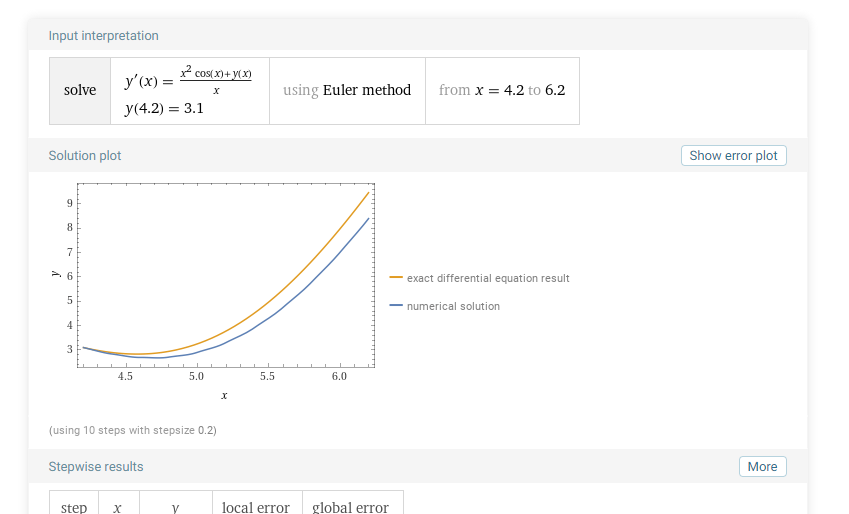
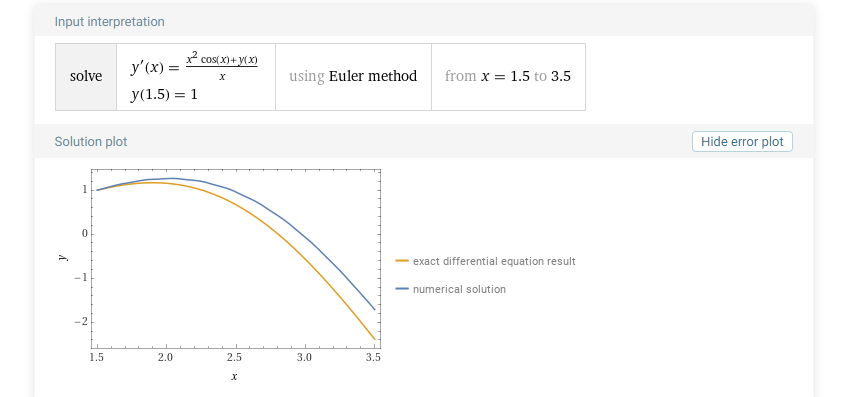